In [ ]:
import numpy as np

def epsilon_greedy(arms, epsilon, plays, rewards):
    n_arms = len(arms)
    #n_plays = np.sum(plays)
    
    if np.random.rand() > epsilon:
      val = [i / j for i, j in zip(rewards, plays)]
      arm = np.argmax(val) 
      #arm = np.argmax(rewards/(plays))
    else:
      arm = np.random.randint(n_arms)
    return arm

In [ ]:
# arms represents the different options (or "arms") that are available to choose from
arms = [0, 1, 2, 3]

# epsilon is the probability of choosing a random arm instead of the greedy arm
epsilon = 0.1

# plays is the number of times each arm has been played, Add small value to avoid divide by zero
plays = [0.000001, 0, 0.000001, 0.000001]

# rewards is the number of rewards received from playing each arm
rewards = [0, 0, 0, 0]

In [ ]:
np.random.seed(seed=42)

In [ ]:
epsilon_greedy(arms, epsilon, plays, rewards)

3

In [ ]:
# arms represents the different options (or "arms") that are available to choose from
arms = [0, 1, 2, 3]

# epsilon is the probability of choosing a random arm instead of the greedy arm
epsilon = 0.1

# plays is the number of times each arm has been played
plays = [10, 10, 10, 10]

# rewards is the number of rewards received from playing each arm
rewards = [4, 8, 1, 0]

In [ ]:
epsilon_greedy(arms, epsilon, plays, rewards)

1

In [ ]:
import pandas as pd

xp = 1000

arm_0 = np.random.normal(1, 2.5, size=(1, xp))
arm_1 = np.random.normal(2, 2.5, size=(1, xp))
arm_2 = np.random.normal(3, 2.5, size=(1, xp))
arm_3 = np.random.normal(4, 2.5, size=(1, xp))

dataset = pd.DataFrame(np.concatenate((arm_0, arm_1, arm_2, arm_3), axis=0).T, columns=["arm_0", "arm_1", "arm_2", "arm_3"])
print(dataset)


arms = [0, 1, 2, 3]
epsilon = 0.1

plays = [0.000001, 0.000001, 0.000001, 0.000001]
rewards = [0, 0, 0, 0]

choices =  np.zeros(xp)
save_cum_reward = np.zeros(xp)

for i in range(xp):
  choice_alg = epsilon_greedy(arms, epsilon, plays, rewards)
  #print(choice_alg)
  rewards[choice_alg] += dataset.iloc[i][choice_alg]
  plays[choice_alg] += 1
  choices[i] = choice_alg
  save_cum_reward[i] += dataset.iloc[i][choice_alg]



        arm_0     arm_1     arm_2     arm_3
0    3.545414 -1.592216  0.696622  3.133103
1    0.987866  5.960400  1.151999  8.522315
2    0.508195  2.449399  1.892308  4.571640
3   -2.269379  3.401923  5.813680 -1.121421
4    0.110270  2.969743  5.023866  4.832912
..        ...       ...       ...       ...
995  1.834588  1.967255  5.219532  5.686697
996 -2.603663  6.274880  5.185905  5.241576
997  5.983356 -1.365396  2.372732 -0.174601
998  2.442306 -1.180133  6.679522  8.165093
999 -2.981660  4.398476  4.249880  3.056689

[1000 rows x 4 columns]


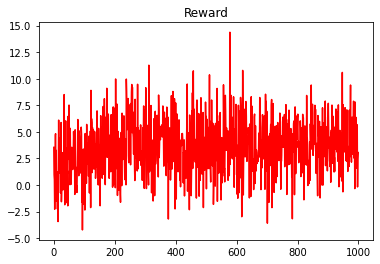

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = range(xp)
y = save_cum_reward

plt.title("Cum Reward")
plt.plot(x, y, color="red")

plt.show()

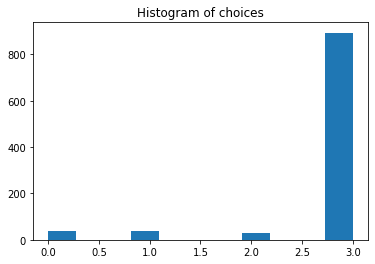

In [ ]:
import matplotlib.pyplot as plt


plt.hist(choices, bins='auto') 
plt.title("Histogram of choices")
plt.show()

In [ ]:
from numpy.ma.core import mean
average_best_arm = mean(dataset[dataset.columns[0]])
for i in arms:
  if average_best_arm < mean(dataset[dataset.columns[i]]):
    average_best_arm = mean(dataset[dataset.columns[i]])

print(average_best_arm)

average_regret= np.zeros(xp)
average_regret[0] = 0

for i in range(1,xp) :
  average_regret[i] = average_best_arm - (save_cum_reward[i]/i)

4.029698521847486


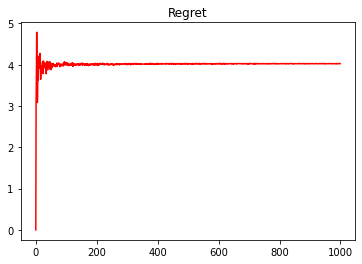

In [ ]:
x = range(0,xp)
y = average_regret

plt.title("Cum Regret")
plt.plot(x, y, color="red")

plt.show()

In [ ]:
def UCB(arms, plays, rewards):
    n_arms = len(arms)
    n_plays = np.sum(plays)
    
    upper_bound = np.zeros(n_arms)
    for arm in range(n_arms):
        if plays[arm] > 0:
            average_reward = rewards[arm] / plays[arm]
            delta = np.sqrt(2 * np.log(n_plays) / plays[arm])
            upper_bound[arm] = average_reward + delta
        else:
            upper_bound[arm] = float('inf')
    return np.argmax(upper_bound)

In [ ]:
import pandas as pd

xp = 1000

arm_0 = np.random.normal(1, 2.5, size=(1, xp))
arm_1 = np.random.normal(2, 2.5, size=(1, xp))
arm_2 = np.random.normal(3, 2.5, size=(1, xp))
arm_3 = np.random.normal(4, 2.5, size=(1, xp))

dataset = pd.DataFrame(np.concatenate((arm_0, arm_1, arm_2, arm_3), axis=0).T, columns=["arm_0", "arm_1", "arm_2", "arm_3"])
print(dataset)


arms = [0, 1, 2, 3]
epsilon = 0.1

plays = [0.000001, 0.000001, 0.000001, 0.000001]
rewards = [0, 0, 0, 0]

choices =  np.zeros(xp)
save_cum_reward = np.zeros(xp)

for i in range(xp):
  choice_alg = UCB(arms,  plays, rewards)
  #print(choice_alg)
  rewards[choice_alg] += dataset.iloc[i][choice_alg]
  plays[choice_alg] += 1
  choices[i] = choice_alg
  save_cum_reward[i] += dataset.iloc[i][choice_alg]



        arm_0     arm_1     arm_2     arm_3
0    0.569063  3.246725  1.506547  6.776883
1    2.786829 -2.856244  3.276045  5.887962
2    4.194642  1.611444  5.992946  6.711194
3    2.426218 -0.889269  1.072395  3.470276
4    1.254308  1.493486  5.502051  2.833453
..        ...       ...       ...       ...
995  4.971118  0.236708  5.948158  6.095035
996 -0.712468  3.239414  4.977850  3.748260
997  3.002954  3.610971  2.288011  1.634215
998  2.913505  0.303763  0.054551  6.937035
999  3.683532  1.236251  4.082126 -0.697452

[1000 rows x 4 columns]


<ipython-input-13-92089fd79eed>:9: RuntimeWarning: invalid value encountered in sqrt
  delta = np.sqrt(2 * np.log(n_plays) / plays[arm])


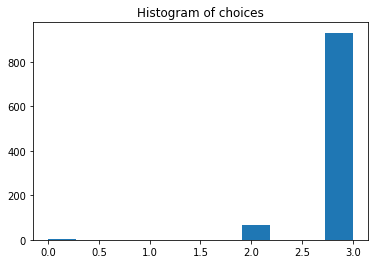

In [ ]:
import matplotlib.pyplot as plt


plt.hist(choices, bins='auto') 
plt.title("Histogram of choices")
plt.show()

In [ ]:
from numpy.ma.core import mean
average_best_arm = mean(dataset[dataset.columns[0]])
for i in arms:
  if average_best_arm < mean(dataset[dataset.columns[i]]):
    average_best_arm = mean(dataset[dataset.columns[i]])

print(average_best_arm)

average_regret= np.zeros(xp)
average_regret[0] = 0

for i in range(1,xp) :
  average_regret[i] = average_best_arm - (save_cum_reward[i]/i)

3.9721181409450073


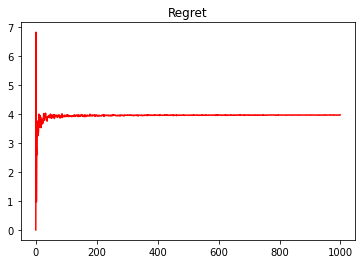

In [ ]:
x = range(0,xp)
y = average_regret

plt.title("Regret")
plt.plot(x, y, color="red")

plt.show()